In [269]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('fivethirtyeight')

In [270]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')
target = data_train['Price']
pd.options.display.max_columns = len(data_train.columns)+10

In [271]:
data_train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [272]:
data_train.shape

(10000, 20)

In [273]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB


In [274]:
data_train = data_train.drop(['Healthcare_1'], axis = 1)
data_test = data_test.drop(['Healthcare_1'], axis =1)

In [275]:
data_train.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,6.000000,23.000000,633233.466570


In [276]:
data_train[data_train['Rooms']> 6].head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
377,5927,57,10.0,59.056975,36.223072,10.0,22,22.0,2002,0.090799,B,B,74,19083,2,5,15,B,317265.323792
1454,8491,1,19.0,42.006046,21.779288,7.0,17,17.0,2014,0.007122,B,B,1,264,0,0,1,B,78364.616704
8849,14865,9,10.0,60.871266,38.420681,10.0,3,2.0,1994,0.161532,B,B,25,5648,1,2,4,B,172329.270863


In [277]:
for i in range(1,7):
    print('{} комнатная квартира'.format(i))
    print(data_train[data_train['Rooms'] == i]['Square'].median())
    

1 комнатная квартира
40.40658991236909
2 комнатная квартира
55.84181213903055
3 комнатная квартира
77.41364294803941
4 комнатная квартира
98.66805357992513
5 комнатная квартира
116.08486083443316
6 комнатная квартира
59.41433379627719


In [278]:
data_train.loc[data_train['Rooms'] > 5]


,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
377,5927,57,10.0,59.056975,36.223072,10.0,22,22.0,2002,0.090799,B,B,74,19083,2,5,15,B,317265.323792
1454,8491,1,19.0,42.006046,21.779288,7.0,17,17.0,2014,0.007122,B,B,1,264,0,0,1,B,78364.616704
2170,14003,99,6.0,59.414334,38.702244,6.0,7,9.0,1969,0.033494,B,B,66,10573,1,3,8,B,229661.964416
8849,14865,9,10.0,60.871266,38.420681,10.0,3,2.0,1994,0.161532,B,B,25,5648,1,2,4,B,172329.270863


In [279]:
data_train.loc[data_train['Rooms']==19,'Rooms']=1
data_train.loc[data_train['Rooms']==6,'Rooms']=2
data_train.loc[data_train['Rooms']==10,'Rooms']=2

In [280]:
data_test.loc[data_test['Rooms'] > 5]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2
2071,10793,23,6.0,110.750226,NaN,0.0,2,2.0,2015,0.014073,B,B,2,475,0,0,0,B
3217,4058,27,6.0,223.453689,104.113552,16.0,2,2.0,2017,0.041116,B,B,53,14892,4,1,4,B
3398,1435,111,17.0,52.866107,32.528342,8.0,15,17.0,1987,0.093443,B,B,23,4635,5,2,4,B


In [281]:
data_test.loc[data_test['Rooms']==17,'Rooms']=2


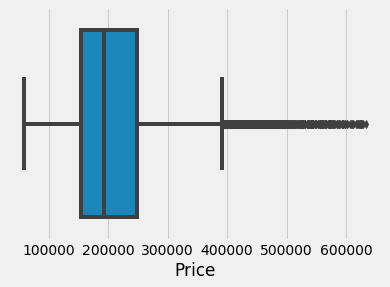

In [282]:
sns.boxplot(data_train['Price'])

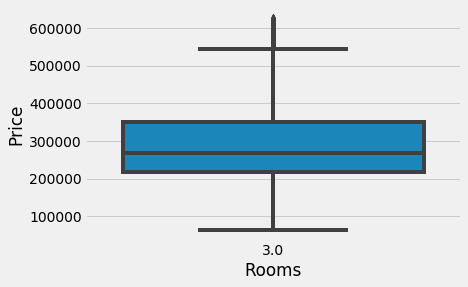

In [283]:
sns.boxplot(x=data_train.loc[data_train['Rooms'] == 3]['Rooms'],y=data_train['Price'])

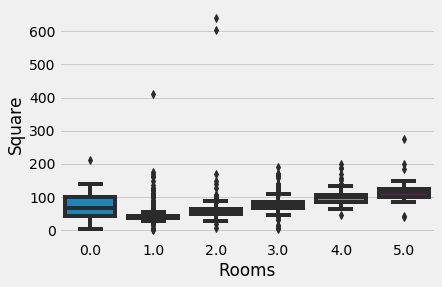

In [284]:
sns.boxplot(x=data_train['Rooms'],y=data_train['Square'])

In [285]:
data_train.loc[data_train['Square']> 300]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
4262,28,9,2.0,604.705972,NaN,1.0,17,18.0,1977,0.161532,B,B,25,5648,1,2,4,B,187717.242538
4690,2307,102,1.0,409.425181,410.639749,10.0,4,4.0,2016,0.238617,B,B,26,3889,6,3,6,B,90470.430830
6977,11602,30,2.0,641.065193,638.163193,10.0,20,19.0,2019,0.000078,B,B,22,6398,141,3,23,B,133529.681562


In [286]:
data_train.loc[data_train['Id']==28,'Square']=60.4705972	
data_train.loc[data_train['Id']==2307	,'Square']=40.9425181	
data_train.loc[data_train['Id']==11602,'Square']=64.1065193	

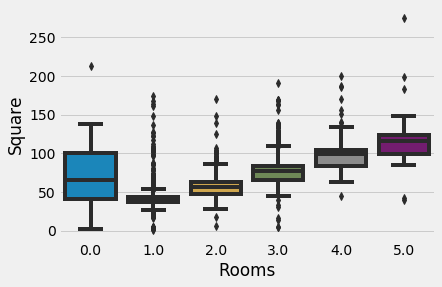

In [287]:
sns.boxplot(x=data_train['Rooms'],y=data_train['Square'])

In [288]:
data_train.loc[(data_train['Square']> 150)&(data_train['Rooms']==5), 'Rooms'] = 6

In [289]:
data_train[data_train['Rooms'] == 6]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
1982,5548,86,6.0,275.645284,233.949309,26.0,12,37.0,2011,0.161976,B,A,31,7010,5,3,7,B,455264.882666
4487,13434,13,6.0,183.382273,100.985505,15.0,2,6.0,1997,0.090799,B,B,74,19083,2,5,15,B,622888.825328
8511,4249,23,6.0,198.930182,123.139863,10.0,1,2.0,2011,0.014073,B,B,2,475,0,0,0,B,345665.209100


In [290]:
data_test[data_test['Rooms'] == 5]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2
78,6553,34,5.0,122.375273,0.333490,0.0,9,0.0,1977,0.069753,B,B,53,13670,4,1,11,B
619,15858,9,5.0,97.537815,63.571997,8.0,5,14.0,1995,0.136244,B,B,11,2370,0,0,1,B
803,3747,23,5.0,139.045763,89.790274,42.0,1,3.0,2015,0.014073,B,B,2,475,0,0,0,B
1040,13562,78,5.0,116.656955,69.561006,10.0,5,14.0,2001,0.219006,B,B,28,6746,3,1,4,B
3253,12316,183,5.0,157.976101,101.040485,12.0,7,8.0,1908,0.246624,B,B,14,2940,45,3,6,B
3339,8638,25,5.0,120.330727,115.328430,1.0,14,25.0,2016,0.069753,B,B,53,13670,4,1,11,B
3912,6060,53,5.0,56.600162,2.742068,1.0,6,18.0,1977,0.049637,B,B,34,7759,0,1,3,B


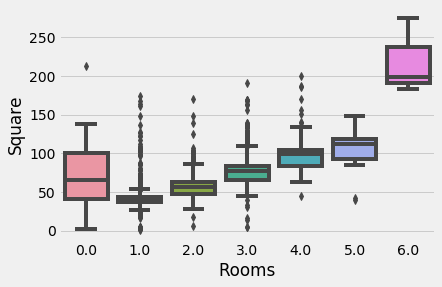

In [291]:
sns.boxplot(x=data_train['Rooms'],y=data_train['Square'])

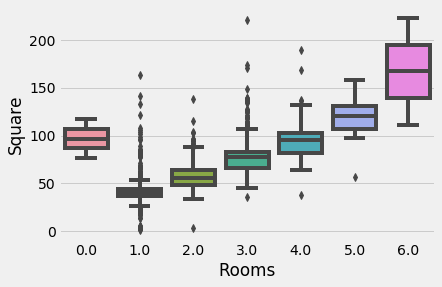

In [292]:
sns.boxplot(x=data_test['Rooms'],y=data_test['Square'])

In [293]:
data_train[data_train['HouseYear'] > 2020]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
1497,10814,109,1.0,37.265070,20.239714,9.0,9,12.0,20052011,0.136330,B,B,30,6141,10,3,6,B,254084.534396
4189,11607,147,2.0,44.791836,28.360393,5.0,4,9.0,4968,0.319809,B,B,25,4756,16,5,8,B,243028.603096


In [294]:
data_train.loc[data_train['HouseYear']==20052011,'HouseYear']=2008

In [295]:
data_train.loc[data_train['HouseYear']==4968,'HouseYear']=1968

In [296]:
index_arr=data_train.loc[(data_train['LifeSquare']-data_train['Square'])>5].index
data_train.loc[index_arr,:]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
212,1748,88,2.0,5.497061,67.628717,1.0,24,22.0,1977,0.127376,B,B,43,8429,3,3,9,B,412511.088764
590,14990,23,2.0,48.449873,263.542020,5.0,6,5.0,1972,0.075779,B,B,6,1437,3,0,2,B,141780.231857
3280,10527,27,1.0,4.380726,40.805837,1.0,10,17.0,2013,0.211401,B,B,9,1892,0,0,1,B,97560.720383
4328,16550,27,3.0,81.694417,7480.592129,1.0,9,17.0,2016,0.017647,B,B,2,469,0,0,0,B,217357.492366
4638,4071,6,3.0,75.203314,82.486992,1.0,13,25.0,2015,0.243205,B,B,5,1564,0,0,0,B,211324.917957
4690,2307,102,1.0,40.942518,410.639749,10.0,4,4.0,2016,0.238617,B,B,26,3889,6,3,6,B,90470.430830
6332,8961,27,1.0,33.398983,164.153360,6.0,3,5.0,1965,0.211401,B,B,9,1892,0,0,1,B,104891.073757
6977,11602,30,2.0,64.106519,638.163193,10.0,20,19.0,2019,0.000078,B,B,22,6398,141,3,23,B,133529.681562
8030,13265,1,3.0,4.823679,79.767964,0.0,6,17.0,1977,0.007122,B,B,1,264,0,0,1,B,237716.681261
8437,15886,85,3.0,78.059331,461.463614,10.0,12,16.0,1998,0.037178,B,B,52,11217,1,1,7,B,394253.299978


In [297]:
def prepare_lifesquare(df):
    df.loc[df['Square']<df['LifeSquare'],'LifeSquare']=df['Square']
    return df

In [298]:
prepare_lifesquare(data_train)
prepare_lifesquare(data_test)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,0,0,B
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,0,2,B
2,5480,190,1.0,13.597819,13.597819,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,5,5,B
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,3,3,B
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,B,2,629,1,0,0,A
5,7633,53,1.0,40.675627,NaN,1.0,21,21.0,1977,0.049637,B,B,34,7759,0,1,3,B
6,13329,23,2.0,68.099538,64.843025,1.0,2,17.0,1977,0.075779,B,B,6,1437,3,0,2,B
7,5502,32,2.0,48.193897,32.857644,6.0,5,14.0,1972,0.135650,B,B,46,7960,6,3,11,B
8,4220,96,3.0,72.277106,45.968758,9.0,17,17.0,1997,0.041116,B,B,53,14892,4,1,4,B
9,11538,6,3.0,80.219400,47.660260,9.0,13,17.0,2014,0.243205,B,B,5,1564,0,0,0,B


In [299]:
def fillna_life_square(df,source_df):
    df['LifeSquare']=df['LifeSquare'].fillna(source_df['LifeSquare'].mean())
    return df
"""def fillna_life_square(df,source_df):
    df1 = pd.DataFrame(columns=df.columns)
    for i in range(0,7):
        a = source_df[source_df['Rooms']==i]['LifeSquare'].mean()
        df2 =df[df['Rooms'] == i]
        df2['LifeSquare'] = df2['LifeSquare'].fillna(a)
        df1 = pd.concat([df1,df2])
    return df1"""
data_train = fillna_life_square(data_train,data_train)
data_test = fillna_life_square(data_test,data_train)

In [368]:
price_mean_by_distr_rooms=data_train.groupby(['DistrictId','Rooms'],as_index=True).agg({'Price':'mean'}).\
                    rename(columns={'Price':'mean_price_dr'})
square_mean_by_distr_rooms=data_train.groupby(['DistrictId','Rooms'],as_index=True).agg({'Square':'mean'}).\
                    rename(columns={'Square':'mean_square_dr'})
def add_mean_price_for_m_2(df,price_mean_by_distr_rooms,square_mean_by_distr_rooms):
    df=pd.merge(df,price_mean_by_distr_rooms,on=['DistrictId','Rooms'],how='left')
    df=pd.merge(df,square_mean_by_distr_rooms,on=['DistrictId','Rooms'],how='left') 
    df['price_dr_r_m^2'] = df['mean_price_dr']/df['mean_square_dr']
    return df



In [301]:
data_train.loc[data_train['Id'] == 11993].head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
7,11993,74,2.0,80.312926,35.929247,0.0,14,0.0,1977,0.075779,B,B,6,1437,3,0,2,B,221244.156664


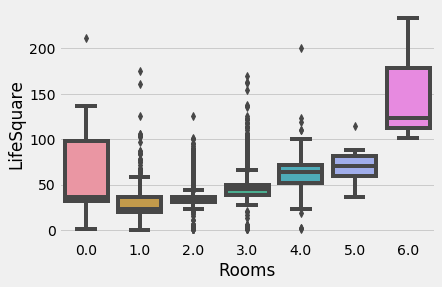

In [302]:
sns.boxplot(x=data_train['Rooms'],y=data_train['LifeSquare'])

In [303]:
data_train[data_train['LifeSquare'] > 3000]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price


In [304]:
data_train.loc[data_train['Id']==16550,'LifeSquare']=data_train[data_train['Rooms'] == 3]['LifeSquare'].median()

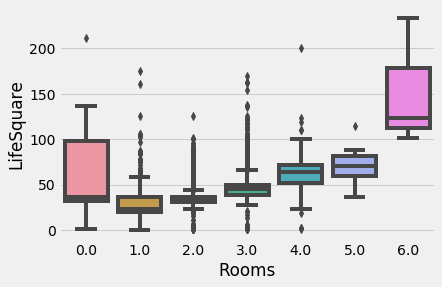

In [305]:
sns.boxplot(x=data_train['Rooms'],y=data_train['LifeSquare'])

In [306]:
data_train[data_train['LifeSquare'] > 200]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
1981,7917,27,0.0,212.932361,211.231125,0.0,2,3.0,2008,0.211401,B,B,9,1892,0,0,1,B,302211.260887
1982,5548,86,6.0,275.645284,233.949309,26.0,12,37.0,2011,0.161976,B,A,31,7010,5,3,7,B,455264.882666
9910,16568,27,4.0,200.334539,200.334539,25.0,1,2.0,2013,0.041116,B,B,53,14892,4,1,4,B,528560.506016


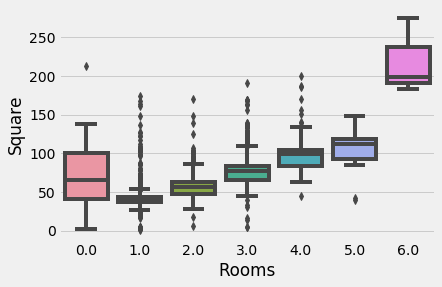

In [307]:
sns.boxplot(x=data_train['Rooms'],y=data_train['Square'])

In [308]:
data_train.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.887000,56.166808,35.925643,6.273300,8.526700,12.609400,1984.86600,0.118858,24.687000,5352.157400,8.039200,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.814185,19.150372,15.673315,28.560917,5.241148,6.775974,18.41187,0.119025,17.532614,4006.799803,23.831875,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1910.00000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.773051,25.494155,1.000000,4.000000,9.000000,1974.00000,0.017647,6.000000,1564.000000,0.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.509275,35.929247,6.000000,7.000000,13.000000,1977.00000,0.075424,25.000000,5285.000000,2.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.889736,41.162786,9.000000,12.000000,17.000000,2001.00000,0.195781,36.000000,7227.000000,5.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,6.000000,275.645284,233.949309,2014.000000,42.000000,117.000000,2020.00000,0.521867,74.000000,19083.000000,141.000000,6.000000,23.000000,633233.466570


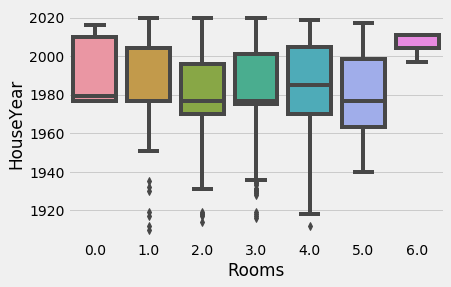

In [309]:
sns.boxplot(x=data_train['Rooms'],y=data_train['HouseYear'])

In [310]:
data_train[data_train['HouseYear'] < 1920]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
910,6751,172,2.0,56.172364,28.384213,7.0,8,6.0,1914,0.000000,B,B,7,1660,39,1,5,B,423580.477982
1380,15193,195,3.0,75.564709,44.872616,9.0,5,7.0,1917,0.015017,B,B,17,3079,59,0,8,B,486057.129888
1386,12229,180,2.0,76.083312,48.026246,14.0,6,5.0,1918,0.037316,B,B,32,6748,93,4,10,B,431701.914829
2554,10919,190,2.0,47.489415,35.564479,4.0,5,5.0,1918,0.000000,B,B,30,7538,87,5,5,B,537979.657509
2608,12329,51,2.0,52.665130,30.099008,8.0,4,4.0,1919,0.015017,B,B,17,3079,59,0,8,B,90314.532343
2656,14556,183,4.0,151.150660,98.187482,23.0,6,7.0,1912,0.037316,B,B,32,6748,93,4,10,B,284884.959104
2902,14543,120,4.0,96.730985,53.589223,17.0,4,5.0,1918,0.000699,B,B,14,3369,24,0,3,B,376419.535842
4904,462,43,1.0,44.082183,27.717690,7.0,4,5.0,1919,0.212515,B,B,19,3293,16,3,7,B,321506.277104
5016,15375,182,2.0,67.838861,65.200025,9.0,7,8.0,1918,0.015017,B,B,17,3079,59,0,8,B,443270.817520
5053,10439,104,1.0,35.507738,20.312725,4.0,6,5.0,1917,0.000078,B,B,22,6398,141,3,23,B,236830.764637


In [311]:
X_corr = data_train.corr()
hight_corr1 = X_corr[(abs(X_corr['Price']) >0.05) & (X_corr['Price'] != 1)]
hight_corr1

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Price
DistrictId,0.012973,1.000000,0.076314,-0.027433,-0.054409,0.040358,-0.120373,-0.149051,-0.201055,0.065294,0.246463,0.167479,0.136095,0.306147,0.174214,0.265100
Rooms,-0.007508,0.076314,1.000000,0.757245,0.541195,0.005113,-0.005855,-0.031078,-0.044041,-0.031138,0.077622,0.072604,0.014552,0.064397,0.054471,0.570944
Square,-0.005777,-0.027433,0.757245,1.000000,0.680971,0.009029,0.116701,0.086969,0.190032,-0.070853,-0.077468,-0.047711,0.022946,-0.032098,0.011148,0.577887
LifeSquare,-0.004238,-0.054409,0.541195,0.680971,1.000000,0.005489,0.086505,0.078552,0.175733,-0.057779,-0.121882,-0.095078,0.041226,-0.060894,0.001329,0.369253
Floor,0.001348,-0.120373,-0.005855,0.116701,0.086505,-0.011397,1.000000,0.418986,0.284487,-0.016133,-0.044914,-0.016560,-0.002237,-0.065537,0.024264,0.128715
HouseFloor,-0.008376,-0.149051,-0.031078,0.086969,0.078552,0.000780,0.418986,1.000000,0.392989,-0.004362,-0.020801,0.007194,-0.008137,-0.068728,0.026279,0.088280
Ecology_1,0.018097,0.065294,-0.031138,-0.070853,-0.057779,-0.005622,-0.016133,-0.004362,-0.066489,1.000000,0.026464,0.009264,-0.124068,0.030873,-0.076749,-0.058381
Social_1,-0.000772,0.246463,0.077622,-0.077468,-0.121882,0.043379,-0.044914,-0.020801,-0.047907,0.026464,1.000000,0.955988,0.023721,0.524593,0.526272,0.263286
Social_2,-0.002033,0.167479,0.072604,-0.047711,-0.095078,0.037805,-0.016560,0.007194,0.013662,0.009264,0.955988,1.000000,0.073379,0.473193,0.559163,0.239226
Social_3,-0.009358,0.136095,0.014552,0.022946,0.041226,-0.015140,-0.002237,-0.008137,-0.049386,-0.124068,0.023721,0.073379,1.000000,0.286434,0.662113,0.074878


In [312]:
data_train = data_train.apply(pd.to_numeric, errors='ignore')
df_train = data_train
#df_train = pd.get_dummies(df_train)
data_test= data_test.apply(pd.to_numeric, errors='ignore')
df_test = data_test
#df_test = pd.get_dummies(df_test)
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       10000 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(7), int64(9), object(3)
memory usage: 1.4+ MB


In [313]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
Id               5000 non-null int64
DistrictId       5000 non-null int64
Rooms            5000 non-null float64
Square           5000 non-null float64
LifeSquare       5000 non-null float64
KitchenSquare    5000 non-null float64
Floor            5000 non-null int64
HouseFloor       5000 non-null float64
HouseYear        5000 non-null int64
Ecology_1        5000 non-null float64
Ecology_2        5000 non-null object
Ecology_3        5000 non-null object
Social_1         5000 non-null int64
Social_2         5000 non-null int64
Social_3         5000 non-null int64
Helthcare_2      5000 non-null int64
Shops_1          5000 non-null int64
Shops_2          5000 non-null object
dtypes: float64(6), int64(9), object(3)
memory usage: 703.2+ KB


In [314]:
df_train = pd.get_dummies(df_train)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       10000 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Price            10000 non-null float64
Ecology_2_A      10000 non-null uint8
Ecology_2_B      10000 non-null uint8
Ecology_3_A      10000 non-null uint8
Ecology_3_B      10000 non-null uint8
Shops_2_A        10000 non-null uint8
Shops_2_B        10000 non-null uint8
dtypes: float64(7), int64(9), uint8(6)
mem

In [315]:
df_test = pd.get_dummies(df_test)
df_test.describe()


,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,8412.595400,51.279200,1.907000,56.449500,35.969292,5.976800,8.632000,12.601000,1984.392600,0.119874,24.933800,5406.900000,8.262600,1.31940,4.242800,0.009600,0.990400,0.029800,0.970200,0.082400,0.917600
std,4832.674037,44.179466,0.810976,19.092787,15.286162,9.950018,5.483228,6.789213,18.573149,0.120070,17.532202,4026.614773,23.863762,1.47994,4.777365,0.097518,0.097518,0.170052,0.170052,0.275001,0.275001
min,1.000000,0.000000,0.000000,1.378543,0.333490,0.000000,1.000000,0.000000,1908.000000,0.000000,0.000000,168.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4221.750000,21.000000,1.000000,41.906231,25.848859,1.000000,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,0.00000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
50%,8320.500000,37.000000,2.000000,52.921340,35.929247,6.000000,7.000000,12.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,1.00000,3.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,12598.250000,77.000000,2.000000,66.285129,41.384025,9.000000,12.000000,17.000000,2000.000000,0.195781,36.000000,7287.000000,5.000000,2.00000,6.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,16795.000000,212.000000,6.000000,223.453689,168.729035,620.000000,78.000000,99.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,6.00000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [316]:
df_train.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Price,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.887000,56.166808,35.925643,6.273300,8.526700,12.609400,1984.86600,0.118858,24.687000,5352.157400,8.039200,1.319500,4.231300,214138.857399,0.009700,0.990300,0.027500,0.972500,0.082500,0.917500
std,4859.01902,43.587592,0.814185,19.150372,15.673315,28.560917,5.241148,6.775974,18.41187,0.119025,17.532614,4006.799803,23.831875,1.493601,4.806341,92872.293865,0.098015,0.098015,0.163543,0.163543,0.275139,0.275139
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1910.00000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,59174.778028,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4169.50000,20.000000,1.000000,41.773051,25.494155,1.000000,4.000000,9.000000,1974.00000,0.017647,6.000000,1564.000000,0.000000,0.000000,1.000000,153872.633942,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
50%,8394.50000,36.000000,2.000000,52.509275,35.929247,6.000000,7.000000,13.000000,1977.00000,0.075424,25.000000,5285.000000,2.000000,1.000000,3.000000,192269.644879,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,12592.50000,75.000000,2.000000,65.889736,41.162786,9.000000,12.000000,17.000000,2001.00000,0.195781,36.000000,7227.000000,5.000000,2.000000,6.000000,249135.462171,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,16798.00000,209.000000,6.000000,275.645284,233.949309,2014.000000,42.000000,117.000000,2020.00000,0.521867,74.000000,19083.000000,141.000000,6.000000,23.000000,633233.466570,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [317]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [318]:
from sklearn.metrics import r2_score as r2,mean_squared_error as mse

In [319]:
parameters = {
    'n_estimators': np.arange(100, 400,50),
    'max_features': np.arange(5, 12),
    'max_depth': np.arange(1, 12),

}


rgr = GridSearchCV(
    estimator=RandomForestRegressor(n_jobs = -1),
    param_grid=parameters,n_jobs =-1
)

In [320]:
df2 = df_train

In [321]:
df2 = add_mean_price_for_m_2(df2,price_mean_by_distr_rooms,square_mean_by_distr_rooms)

In [322]:
X1 = df2.drop(['Price'],axis = 1)
y1 = target
feat = ['DistrictId','Rooms','Square', 'LifeSquare', 'Social_1', 'Helthcare_2','Social_2'
        ,'Shops_1','Floor','HouseFloor','Social_3','Ecology_1','price_dr_r_m^2',
        'mean_square_dr','mean_price_dr']

In [323]:
df2.corr()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Price,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B,mean_price_dr,mean_square_dr,price_dr_r_m^2
Id,1.000000,0.012973,-0.007508,-0.005777,-0.004238,0.019880,0.001348,-0.008376,0.003471,0.018097,-0.000772,-0.002033,-0.009358,0.001502,-0.008718,0.009880,-0.003099,0.003099,0.005408,-0.005408,-0.003645,0.003645,0.002797,-0.010818,0.011038
DistrictId,0.012973,1.000000,0.076314,-0.027433,-0.054409,0.040358,-0.120373,-0.149051,-0.201055,0.065294,0.246463,0.167479,0.136095,0.306147,0.174214,0.265100,0.093406,-0.093406,0.027902,-0.027902,0.021018,-0.021018,0.330062,-0.032472,0.478343
Rooms,-0.007508,0.076314,1.000000,0.757245,0.541195,0.005113,-0.005855,-0.031078,-0.044041,-0.031138,0.077622,0.072604,0.014552,0.064397,0.054471,0.570944,0.002458,-0.002458,0.007567,-0.007567,0.001440,-0.001440,0.710850,0.896349,-0.035541
Square,-0.005777,-0.027433,0.757245,1.000000,0.680971,0.009029,0.116701,0.086969,0.190032,-0.070853,-0.077468,-0.047711,0.022946,-0.032098,0.011148,0.577887,-0.032139,0.032139,-0.023707,0.023707,0.056634,-0.056634,0.532028,0.844811,-0.189887
LifeSquare,-0.004238,-0.054409,0.541195,0.680971,1.000000,0.005489,0.086505,0.078552,0.175733,-0.057779,-0.121882,-0.095078,0.041226,-0.060894,0.001329,0.369253,-0.024644,0.024644,-0.028390,0.028390,0.033021,-0.033021,0.367410,0.607419,-0.182249
KitchenSquare,0.019880,0.040358,0.005113,0.009029,0.005489,1.000000,-0.011397,0.000780,0.038539,-0.005622,0.043379,0.037805,-0.015140,0.043170,0.010216,0.028864,-0.000268,0.000268,0.007919,-0.007919,0.017315,-0.017315,0.028804,0.000051,0.036854
Floor,0.001348,-0.120373,-0.005855,0.116701,0.086505,-0.011397,1.000000,0.418986,0.284487,-0.016133,-0.044914,-0.016560,-0.002237,-0.065537,0.024264,0.128715,-0.049661,0.049661,-0.025767,0.025767,0.013626,-0.013626,0.007622,0.058963,-0.067015
HouseFloor,-0.008376,-0.149051,-0.031078,0.086969,0.078552,0.000780,0.418986,1.000000,0.392989,-0.004362,-0.020801,0.007194,-0.008137,-0.068728,0.026279,0.088280,-0.059347,0.059347,-0.009258,0.009258,-0.051002,0.051002,-0.022331,0.030851,-0.072770
HouseYear,0.003471,-0.201055,-0.044041,0.190032,0.175733,0.038539,0.284487,0.392989,1.000000,-0.066489,-0.047907,0.013662,-0.049386,-0.116349,-0.002138,0.036628,-0.076810,0.076810,-0.047168,0.047168,0.058823,-0.058823,-0.092738,0.090158,-0.220563
Ecology_1,0.018097,0.065294,-0.031138,-0.070853,-0.057779,-0.005622,-0.016133,-0.004362,-0.066489,1.000000,0.026464,0.009264,-0.124068,0.030873,-0.076749,-0.058381,0.110725,-0.110725,0.223197,-0.223197,-0.079809,0.079809,-0.047567,-0.071833,0.012599


In [324]:
#X.shape, df_test.shape

In [325]:
X_train, X_test, y_train, y_test = train_test_split(X1[feat],y1, test_size =0.3)

In [326]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']

In [327]:
rgr.fit(X_train, y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': array([100, 150, 200, 250, 300, 350]), 'max_features': array([ 5,  6,  7,  8,  9, 10, 11]), 'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [328]:
cv_results = pd.DataFrame(rgr.cv_results_)

cv_results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_max_features', 'param_n_estimators', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score',
       'split0_train_score', 'split1_train_score', 'split2_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')

In [329]:
param_columns = [
    column
    for column in cv_results.columns
    if column.startswith('param_')
]

score_columns = ['mean_test_score', 'mean_train_score']

cv_results = (cv_results[param_columns + score_columns]
              .sort_values(by=score_columns, ascending=False))

cv_results.head(20)

,param_max_depth,param_max_features,param_n_estimators,mean_test_score,mean_train_score
443,11,8,350,0.757220,0.919512
430,11,6,300,0.757088,0.917716
437,11,7,350,0.757087,0.918820
445,11,9,150,0.756959,0.919766
454,11,10,300,0.756528,0.920553
400,10,8,300,0.756507,0.902240
440,11,8,200,0.756296,0.919529
449,11,9,350,0.756245,0.920315
448,11,9,300,0.756202,0.920443
442,11,8,300,0.756132,0.919730


In [330]:
rgr.best_params_

{'max_depth': 11, 'max_features': 8, 'n_estimators': 350}

In [341]:
rgr1 = RandomForestRegressor(max_depth=11, max_features=8, n_estimators=350)

rgr1.fit(X_train, y_train)

y_pred1 = rgr1.predict(X_test)

r2(y_test, y_pred1), r2(y_train,rgr1.predict(X_train))

(0.7800769065895409, 0.9084854242979064)

In [332]:
rgr2= RandomForestRegressor(max_depth=10, max_features=7, n_estimators=300)

rgr2.fit(X_train, y_train)

y_pred2 = rgr2.predict(X_test)

r2(y_test, y_pred2), r2(y_train,rgr2.predict(X_train))

(0.7783944286736058, 0.8874589621758974)

In [333]:
rgr3= RandomForestRegressor(max_depth=10, max_features=7, n_estimators=350)

rgr3.fit(X_train, y_train)

y_pred3 = rgr3.predict(X_test)

r2(y_test, y_pred3), r2(y_train,rgr3.predict(X_train))

(0.778346457388847, 0.887627277144134)

In [334]:
from sklearn.svm import SVR

In [335]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_1 = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

X_test_1 = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [336]:
c_values = np.logspace(-2, 5, 36)

accuracy_on_valid = []
accuracy_on_train = []

for i, value in enumerate(c_values):
    rgr5 = SVR(C=value, gamma="auto")
    
    rgr5.fit(X_train_1, y_train)
    
    y_pred5 = rgr5.predict(X_test_1)
    y_pred_train5 = rgr5.predict(X_train_1)
        
    acc_valid = r2(y_test, y_pred5)
    acc_train = r2(y_train, y_pred_train5)
    
    if i % 5 == 0:
        print('C = {}'.format(value))
        print('\tacc_valid = {}'.format(acc_valid))
        print('\tacc_train = {}\n'.format(acc_train))
    
    accuracy_on_valid.append(acc_valid)
    accuracy_on_train.append(acc_train)

C = 0.01
	acc_valid = -0.04429836335043702
	acc_train = -0.05460694104492081

C = 0.1
	acc_valid = -0.0442459810081155
	acc_train = -0.05455384998914958

C = 1.0
	acc_valid = -0.043644354601023894
	acc_train = -0.053937954745524985

C = 10.0
	acc_valid = -0.03859613393468653
	acc_train = -0.04883291506623211

C = 100.0
	acc_valid = 0.01317675301767196
	acc_train = 0.003812532322099327

C = 1000.0
	acc_valid = 0.31040719375936376
	acc_train = 0.3016334276657795

C = 10000.0
	acc_valid = 0.6569386627621459
	acc_train = 0.6456254365413341

C = 100000.0
	acc_valid = 0.7377819486848309
	acc_train = 0.724131806145484



In [453]:
df2_test = add_mean_price_for_m_2(data_test,price_mean_by_distr_rooms,square_mean_by_distr_rooms)

In [454]:
df2_test.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,mean_price_dr,mean_square_dr,price_dr_r_m^2
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,4933.000000,4933.000000,4933.000000
mean,8412.595400,51.279200,1.907000,56.449500,35.969292,5.976800,8.632000,12.601000,1984.392600,0.119874,24.933800,5406.900000,8.262600,1.31940,4.242800,214261.878070,56.194880,3886.638009
std,4832.674037,44.179466,0.810976,19.092787,15.286162,9.950018,5.483228,6.789213,18.573149,0.120070,17.532202,4026.614773,23.863762,1.47994,4.777365,71957.179073,15.887936,996.034762
min,1.000000,0.000000,0.000000,1.378543,0.333490,0.000000,1.000000,0.000000,1908.000000,0.000000,0.000000,168.000000,0.000000,0.00000,0.000000,84250.557673,31.162884,1016.753916
25%,4221.750000,21.000000,1.000000,41.906231,25.848859,1.000000,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,0.00000,1.000000,166014.055413,42.673002,3019.236720
50%,8320.500000,37.000000,2.000000,52.921340,35.929247,6.000000,7.000000,12.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,1.00000,3.000000,198777.278269,52.886545,3982.103677
75%,12598.250000,77.000000,2.000000,66.285129,41.384025,9.000000,12.000000,17.000000,2000.000000,0.195781,36.000000,7287.000000,5.000000,2.00000,6.000000,246262.924161,64.203401,4554.553733
max,16795.000000,212.000000,6.000000,223.453689,168.729035,620.000000,78.000000,99.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,6.00000,23.000000,593618.746096,198.930182,8810.193794


In [451]:
def add_mean_price_for_m_2_fill_nan(df):
        
        df["mean_price_dr"] = df.groupby("Rooms").transform(lambda x: x.fillna(x.mean()))
        df["mean_square_dr"] = df.groupby("Rooms").transform(lambda x: x.fillna(x.mean()))
        df["price_dr_r_m^2"] = df.groupby("Rooms").transform(lambda x: x.fillna(x.mean()))
        return df

In [455]:
df2_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 21 columns):
Id                5000 non-null int64
DistrictId        5000 non-null int64
Rooms             5000 non-null float64
Square            5000 non-null float64
LifeSquare        5000 non-null float64
KitchenSquare     5000 non-null float64
Floor             5000 non-null int64
HouseFloor        5000 non-null float64
HouseYear         5000 non-null int64
Ecology_1         5000 non-null float64
Ecology_2         5000 non-null object
Ecology_3         5000 non-null object
Social_1          5000 non-null int64
Social_2          5000 non-null int64
Social_3          5000 non-null int64
Helthcare_2       5000 non-null int64
Shops_1           5000 non-null int64
Shops_2           5000 non-null object
mean_price_dr     4933 non-null float64
mean_square_dr    4933 non-null float64
price_dr_r_m^2    4933 non-null float64
dtypes: float64(9), int64(9), object(3)
memory usage: 859.4+ KB


In [457]:
df2_test = add_mean_price_for_m_2_fill_nan(df2_test)

In [458]:
y_pred_test=rgr1.predict(df2_test[feat])

In [459]:
result=pd.concat([df2_test['Id'],pd.Series(y_pred_test)],axis=1).rename(columns={0:'Price'})

In [460]:
result.to_csv('NButorin_predictions.csv',index=None)